In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import vectorbt as vbt
from datetime import datetime


In [2]:
custom_strategy2 = ta.Strategy(
    name = 'just_for_fun2',
    description = '่just_for_fun2',
    ta = [
        {'kind':'rsi', 'length': 14},
        {'kind':'macd'},
       

    ]
    )

In [3]:
data = pd.read_csv(r'C:\Users\zig53\vscode jupyther\Datasets\BTC-USD_6years.csv')


In [4]:
def my_strategy2(df):
    if (df.RSI_14 < 80) and (df.MACD_12_26_9 > df.MACDs_12_26_9):
        return True
    else:
        return False


In [5]:
df2 = data.copy()
df2.ta.strategy(custom_strategy2)
df2


,datetime,symbol,open,high,low,close,volume,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,2016-06-05 07:00:00,BITFINEX:BTCUSD,573.08,586.470000,564.64,574.020000,28143.301081,NaN,NaN,NaN,NaN
1,2016-06-06 07:00:00,BITFINEX:BTCUSD,574.01,588.600000,573.93,585.340000,27464.294823,NaN,NaN,NaN,NaN
2,2016-06-07 07:00:00,BITFINEX:BTCUSD,585.59,592.080000,561.30,576.880000,36112.753034,NaN,NaN,NaN,NaN
3,2016-06-08 07:00:00,BITFINEX:BTCUSD,577.23,585.150000,570.62,583.050000,18084.176162,NaN,NaN,NaN,NaN
4,2016-06-09 07:00:00,BITFINEX:BTCUSD,583.26,584.050000,569.97,575.520000,21873.892421,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2185,2022-06-06 07:00:00,BITFINEX:BTCUSD,29934.00,31775.000000,29907.00,31371.832115,4782.517908,51.347354,-713.697987,419.625964,-1133.323950
2186,2022-06-07 07:00:00,BITFINEX:BTCUSD,31333.00,31591.000000,29174.00,31137.000000,6349.121404,50.283501,-591.975271,433.078944,-1025.054215
2187,2022-06-08 07:00:00,BITFINEX:BTCUSD,31138.00,31339.000000,29872.00,30226.000000,2636.997604,46.277772,-562.534679,370.015629,-932.550307
2188,2022-06-09 07:00:00,BITFINEX:BTCUSD,30225.00,30711.830553,29952.00,30112.151915,2090.606267,45.786876,-542.139934,312.328298,-854.468233


In [6]:
df2['signal'] = df2.apply(my_strategy2, axis = 1)

In [7]:
signal_vectorbt2 = df2.ta.tsignals(df2['signal'], asbool = True, append  = True, trade_offset = 1)

In [25]:
port2 = vbt.Portfolio.from_signals(df2.open,
                                  entries = signal_vectorbt2.TS_Entries,
                                  exits = signal_vectorbt2.TS_Exits,
                                  freq = 'D',                
                                  init_cash = 100000,
                                  fees = 0.0025,
                                  size = 1,
                                  size_type = 'Percent'

                                   ).exit_trades

In [26]:
rec = port2.records_readable
rec.head()

,Exit Trade Id,Column,Size,Entry Timestamp,Avg Entry Price,Entry Fees,Exit Timestamp,Avg Exit Price,Exit Fees,PnL,Return,Direction,Status,Position Id
0,0,0,146.009285,43,683.18,249.376559,48,648.11,236.575195,-5606.497384,-0.056205,Long,Closed,0
1,1,0,161.922799,71,581.50,235.395268,98,607.98,246.114558,3806.205879,0.040424,Long,Closed,1
2,2,0,159.514756,112,614.08,244.887054,131,632.46,252.216757,2434.777407,0.024856,Long,Closed,2
3,3,0,150.954942,133,664.99,250.958818,140,714.74,269.733839,6989.315723,0.069626,Long,Closed,3
4,4,0,152.803867,141,702.57,268.388533,144,751.10,286.927462,6860.255688,0.063902,Long,Closed,4


In [27]:
port2.plot().show()

#Benchmark is buy and hold

In [28]:
port2.stats()

Start                                                  0
End                                                 2189
Period                                2190 days 00:00:00
First Trade Start                                     43
Last Trade End                                      2189
Coverage                              1079 days 00:00:00
Overlap Coverage                         0 days 00:00:00
Total Records                                        102
Total Long Trades                                    102
Total Short Trades                                     0
Total Closed Trades                                  101
Total Open Trades                                      1
Open Trade PnL                              48053.902048
Win Rate [%]                                   48.514851
Max Win Streak                                         9
Max Loss Streak                                        6
Best Trade [%]                                 60.262287
Worst Trade [%]                

In [29]:
cf = pd.DataFrame(port2.cash_flow(), index = df2.index, columns = ['cash_flow'])
cf.head()

AttributeError: 'ExitTrades' object has no attribute 'cash_flow'

In [ ]:
b = cf.loc[cf['cash_flow'] != 0]
b['shift'] = b['cash_flow'].shift(1)
b.head()

C:\Users\zig53\AppData\Local\Temp\ipykernel_20696\1726017059.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cash_flow,shift
43,-100000.000000,NaN
48,94393.502616,-100000.000000
71,-94393.502616,94393.502616
98,98199.708495,-94393.502616
112,-98199.708495,98199.708495


In [ ]:
b['profit'] = b['cash_flow'] + b['shift']
b.reset_index(inplace = True)

b

C:\Users\zig53\AppData\Local\Temp\ipykernel_20696\2046552560.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,cash_flow,shift,profit
0,43,-1.000000e+05,NaN,NaN
1,48,9.439350e+04,-1.000000e+05,-5.606497e+03
2,71,-9.439350e+04,9.439350e+04,-1.455192e-11
3,98,9.819971e+04,-9.439350e+04,3.806206e+03
4,112,-9.819971e+04,9.819971e+04,0.000000e+00
...,...,...,...,...
198,2104,-1.668729e+06,1.668729e+06,-2.328306e-10
199,2124,1.836035e+06,-1.668729e+06,1.673054e+05
200,2153,-1.836035e+06,1.836035e+06,0.000000e+00
201,2154,1.682822e+06,-1.836035e+06,-1.532127e+05


<AxesSubplot:>

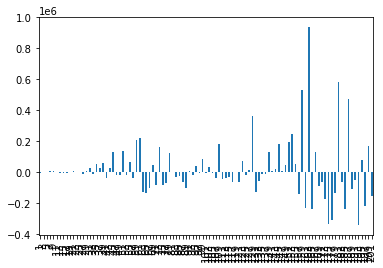

In [ ]:
tradelog = b.iloc[1::2]
tradelog['profit'].plot(kind = 'bar')